In [1]:
import pandas as pd
import glob

In [2]:
for name in glob.glob('*.csv'):
    print (name)

inventory.csv
states0.csv
states1.csv
states2.csv
states3.csv
states4.csv
states5.csv
states6.csv
states7.csv
states8.csv
states9.csv


In [3]:
 # use your path
all_files = glob.glob("states*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
  ##  print (li)

us_census = pd.concat(li,  ignore_index=True)

In [4]:
us_census.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [5]:
print(us_census.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [6]:
us_census['Income']=us_census['Income'].str.extract(r'(\d+.\d+)').astype('float')


In [7]:
new= us_census["GenderPop"].str.split("_",expand = True)
new.head()

,0,1
0,2341093M,2489527F
1,384160M,349215F
2,3299088M,3342840F
3,1451913M,1506295F
4,19087135M,19334329F


In [8]:


us_census["Men"]=new[0]
us_census["Women"]=new[1]

us_census["Men"]=us_census["Men"].str.strip('M')
us_census["Women"]=us_census["Women"].str.strip('F')

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329


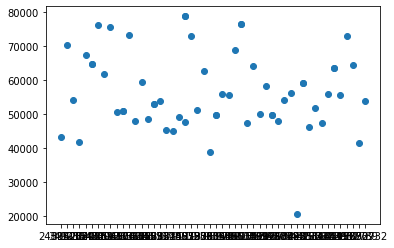

In [9]:
import matplotlib.pyplot as plt
plt.scatter(us_census["Women"], us_census["Income"]) 
plt.show()


0      2489527
1       349215
2      3342840
3      1506295
4     19334329
5      2630239
6      2630239
7      1841615
8       478041
9       340810
10    10045763
11     5123362
12     5123362
13      696428
14      806083
15     6556862
16     3333382
17     1558931
18     1558931
19     1453125
20     2233145
21     2364097
22      679019
23            
24            
25     3455936
26     5038598
27     2727005
28     1536358
29     3081445
30     3081445
31            
32      939759
33     1390901
34      670717
35     4561386
36     4561386
37     1051703
38    10131373
39     5049925
40      353677
41     5913084
42     5913084
43     1942789
44     1990780
45     6534215
46     1869213
47      543273
48      543273
49     2455167
50      419713
51     3331859
52    13367298
53     1444150
54     1444150
55      318031
56     4195682
57     3497739
58      937789
59     2890732
Name: Women, dtype: object
0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4    

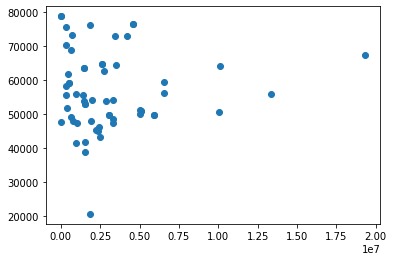

In [10]:
print(us_census['Women'])
us_census['Women'] = pd.to_numeric(us_census['Women']).fillna(0)
print(us_census['Women'])
us_census['Men'] = pd.to_numeric(us_census['Men']).fillna(0)
us_census['Income'] = us_census['Income'].fillna(0)
plt.scatter(us_census["Women"], us_census["Income"]) 
plt.show()


In [11]:

difference=(us_census['TotalPop']-us_census['Men'])
difference.head()


0     2489527
1      349215
2     3342840
3     1506295
4    19334329
dtype: int64

In [12]:
us_census[us_census.duplicated()]


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women


In [13]:
us_census.drop_duplicates(inplace=True)


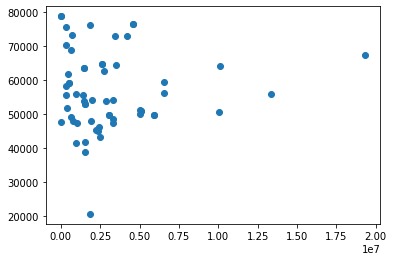

In [14]:
plt.scatter(us_census["Women"], us_census["Income"]) 
plt.show()

In [15]:
print(us_census['Hispanic'].str.strip('%').astype(float))

0      3.751616
1      5.909581
2     29.565921
3      6.215474
4     37.291875
5     20.784380
6     20.784380
7     15.604831
8      8.824766
9      9.165922
10    21.338543
11     8.418242
12     8.418242
13     9.186709
14    11.505369
15    15.601734
16     6.536744
17     5.303645
18     5.303645
19    11.644342
20     3.222994
21     4.866489
22     1.431909
23     8.472498
24     8.472498
25    11.461066
26     4.634993
27     5.152924
28     2.842401
29     4.037248
30     4.037248
31     3.268889
32     9.203759
33    27.100884
34     3.321918
35    18.749500
36    18.749500
37    45.282932
38    17.241425
39     8.464763
40     2.832683
41     3.672084
42     3.672084
43    10.079904
44    11.441212
45     6.128014
46    98.893574
47    13.356667
48    13.356667
49     5.056685
50     3.239640
51     4.720027
52    38.046738
53    13.468376
54    13.468376
55     1.609290
56     8.011016
57    11.140969
58     1.290909
59     6.683333
Name: Hispanic, dtype: float64


In [16]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

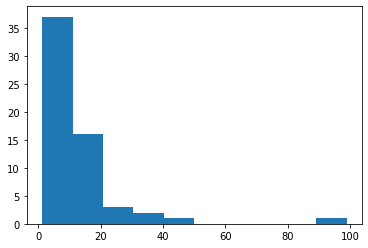

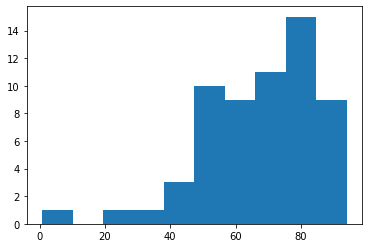

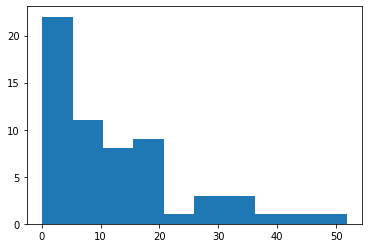

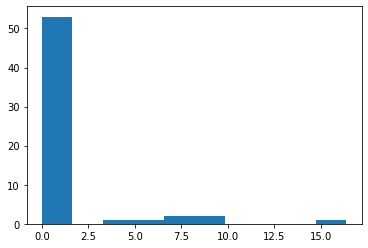

In [17]:

plt.hist(us_census['Hispanic'].str.strip('%').astype(float))
plt.show() 
plt.hist(us_census['White'].str.strip('%').astype(float))
plt.show() 
plt.hist(us_census['Black'].str.strip('%').astype(float))
plt.show() 
plt.hist(us_census['Native'].str.strip('%').astype(float))
plt.show() 

In [18]:
all_files = glob.glob( "inventory*.csv")
print(all_files)

['inventory.csv']


In [19]:
li=[]
for filename in all_files:
    inventory = pd.read_csv(filename, index_col=None, header=0)
    li.append(inventory)
  ##  print (li)

inventory = pd.concat(li,  ignore_index=True)


In [20]:
inventory

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [21]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [22]:
staten_island = inventory.iloc[:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [23]:
product_request = staten_island.product_description
print(product_request)

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object


In [24]:
#5.Another customer emails to ask what types of seeds are sold at the Brooklyn location.

#Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

seed_request = inventory[(inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [25]:
inventory['in_stock'] = inventory.apply(lambda row: True if row.quantity >0 else False, axis = 1)
print(inventory['in_stock'])

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
Name: in_stock, dtype: bool


In [26]:
inventory['total_value'] = inventory.apply(lambda row: row.price * row.quantity, axis=1)
print(inventory['total_value'])

0       27.96
1      919.54
2     1189.15
3       55.96
4        0.00
5     1859.07
6      961.26
7      191.92
8        0.00
9      211.47
10     349.50
11       0.00
12       0.00
13     209.85
14    7379.18
15     719.64
16    1039.20
17    1823.24
18      89.95
19     103.74
20     398.43
21    1899.05
22     629.55
23     293.79
24    8819.02
25     519.74
26       0.00
27     383.84
28    1565.13
Name: total_value, dtype: float64


In [27]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

inventory['full_description'] = inventory.apply(combine_lambda, axis=1)
print(inventory['full_description'])

0                            seeds - daisy
1                       seeds - calla lily
2                           seeds - tomato
3                      garden tools - rake
4               garden tools - wheelbarrow
5                     garden tools - spade
6             pest_control - insect killer
7               pest_control - weed killer
8     planter - 20 inch terracotta planter
9         planter - 8 inch plastic planter
10                           seeds - daisy
11                      seeds - calla lily
12                          seeds - tomato
13                     garden tools - rake
14              garden tools - wheelbarrow
15                    garden tools - spade
16            pest_control - insect killer
17              pest_control - weed killer
18    planter - 20 inch terracotta planter
19        planter - 8 inch plastic planter
20                           seeds - daisy
21                      seeds - calla lily
22                          seeds - tomato
23         